In [1]:
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def read_features_from_csv(filename,usecols = range(1, 785)):
    features = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=usecols, dtype=np.float32)
    features = np.divide(features, 255.0)
    return features

def read_labels_from_csv(filename):
    labels_original = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0, dtype=np.int)
    labels = np.zeros([len(labels_original),10])
    labels[np.arange(len(labels_original)), labels_original] = 1
    labels = labels.astype(np.float32)
    return labels

In [4]:
features = read_features_from_csv("input/fashion-mnist_train.csv")
labels = read_labels_from_csv('input/fashion-mnist_train.csv')

In [5]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
features.shape

(60000, 784)

In [7]:
features[10]

array([0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.16078432,
       0.63529414, 0.654902  , 0.32941177, 0.11764706, 0.14901961,
       0.36862746, 0.69411767, 0.6901961 , 0.10196079, 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.16078432,
       0.5764706 , 0.89411765, 0.9490196 , 0.89411765, 0.9254902 ,
       0.9843137 , 0.9843137 , 0.9843137 , 1.        , 0.9490196 ,
       0.9019608 , 0.96862745, 0.8666667 , 0.49019608, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.35686275, 0.84705883, 0.89411765, 0.87058824,
       0.85882354, 0.85882354, 0.85490197, 0.87058824, 0.78431374,
       0.8784314 , 0.9019608 , 0.8666667 , 0.87058824, 0.87058

In [8]:
np.reshape(features[10],(28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.16078432,
        0.63529414, 0.654902  , 0.32941177, 0.11764706, 0.14901961,
        0.36862746, 0.69411767, 0.6901961 , 0.10196079, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.16078432, 0.5764706 , 0.89411765, 0.9490196 ,
        0.89411765, 0.9254902 , 0.9843137 , 0.9843137 , 0.9843137 ,
        1.        , 0.9490196 , 0.9019608 , 0.96862745, 0.8666667 ,
        0.49019608, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.35686275, 0.84705883, 0.89411765, 0.87058824, 0.85882354,
        0.85882354, 0.85490197, 0.87058824, 0.78431374, 0.8784314 ,
        0.9019608 , 0.8666

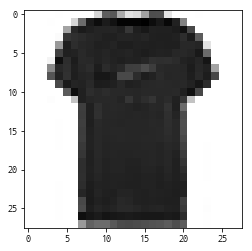

In [9]:
plt.imshow(np.reshape(features[10],(28,28)),cmap='gray_r')
plt.show()

In [10]:
labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:
labels.shape

(60000, 10)

In [12]:
data = pd.read_csv('input/fashion-mnist_train.csv', delimiter=',', header = 0)

In [13]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [14]:
data.iloc[:,1:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,5,4,5,5,3,5,6,...,7,8,7,4,3,7,5,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,3,2,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [15]:
data = data.iloc[:,1:]
#to get image of size 28x28 from cloumn 1-785

In [16]:
data.shape

(60000, 784)

In [17]:
data.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
data = data.values

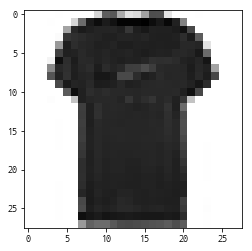

In [19]:
plt.imshow(np.reshape(data[10],(28,28)),cmap='gray_r')
plt.show()

In [20]:
#reset the tensorflow graph 
tf.reset_default_graph()

In [21]:
#input to the graph
x = tf.placeholder(tf.float32, shape = [None,784])
y_ = tf.placeholder(tf.float32, shape = [None,10])

In [22]:
#reshape the  x to feaature 2d image
x_image = tf.reshape(x, [-1, 28,28, 1])

# layer

In [23]:
#convolutional layer 1
w_conv1 = tf.Variable( tf.truncated_normal( [5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable( tf.constant(0.1, shape=[32]))

h_conv1 = tf.nn.relu( tf.nn.conv2d(input = x_image, filter =w_conv1, strides=[ 1, 1, 1, 1], padding="SAME") + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

In [24]:
h_pool1.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [25]:
#convolutional layer 2
w_conv2 = tf.Variable( tf.truncated_normal( [5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable( tf.constant(0.1, shape=[64]))

h_conv2 = tf.nn.relu( tf.nn.conv2d(input = h_pool1, filter = w_conv2, strides=[ 1, 1, 1, 1], padding="SAME") + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides= [1, 2, 2, 1], padding="SAME")

In [26]:
h_pool2.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [27]:
#fully connected layer 1
w_fc1 = tf.Variable( tf.truncated_normal([7 * 7 * 64, 1024],stddev = 0.1))
b_fc1 = tf.Variable( tf.constant(0.1, shape = [1024]))

h_pool2_flat =  tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu( tf.matmul( h_pool2_flat, w_fc1) + b_fc1)

In [28]:
h_fc1.shape

TensorShape([Dimension(None), Dimension(1024)])

In [29]:
#dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [30]:
#fully connected layer2
w_fc2 = tf.Variable( tf.truncated_normal( [1024, 10], stddev = 0.1))
b_fc2 = tf.Variable( tf.constant( 0.1, shape = [10]))

y = tf.matmul(h_fc1_drop, w_fc2) + b_fc2

In [31]:
y.shape

TensorShape([Dimension(None), Dimension(10)])

In [32]:
y

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

#### adamoptimizer and loss calculated by with cross_entropy_with_logits를 사용하여 출력을 최적화

In [33]:
cross_entropy  = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits=y, labels= y_))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

In [34]:
correct_prediction  = tf.equal( tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean( tf.cast( correct_prediction, tf.float32))

In [35]:
sess = tf.InteractiveSession()

In [36]:
sess.run(tf.global_variables_initializer())

In [37]:
BatchSize = 50
TrainSplit = 0.999
TrainigStep = 1000

In [38]:
def generate_batch(features, labels, batch_size):
    batch_indexes = np.random.random_integers(0, len(features) - 1, batch_size)
    batch_features = features[batch_indexes]
    batch_labels = labels[batch_indexes]
    
    return (batch_features, batch_labels)

In [39]:
#split the data into training and validation
train_samples = int( len(features) / (1 / TrainSplit))

train_features = features[: train_samples]
train_labels   = labels[: train_samples]

validation_features = features[train_samples: ]
validation_labels = labels[train_samples: ]

In [40]:
accuracy_history = []
for i in range(TrainigStep):
    
    batch_features, batch_labels = generate_batch(train_features, train_labels, BatchSize)
    
    if i%100 == 0:
        accuracy_ = sess.run( accuracy, feed_dict = {x : validation_features, y_: validation_labels, keep_prob:1.0})
        accuracy_history.append(accuracy_)
        print("step  %i  and validation acc :%g "%(i, accuracy_))

    sess.run(train_step, feed_dict = { x: batch_features, y_: batch_labels, keep_prob:0.5})

/opt/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 59938 + 1) instead
  


step  0  and validation acc :0.114754 
step  100  and validation acc :0.852459 
step  200  and validation acc :0.885246 
step  300  and validation acc :0.885246 
step  400  and validation acc :0.885246 
step  500  and validation acc :0.852459 
step  600  and validation acc :0.885246 
step  700  and validation acc :0.885246 
step  800  and validation acc :0.868852 
step  900  and validation acc :0.885246 


In [41]:
ftest = read_features_from_csv('input/fashion-mnist_test.csv')
ltest = read_labels_from_csv('input/fashion-mnist_test.csv')

In [42]:
ftest.shape

(10000, 784)

In [43]:
ltest.shape

(10000, 10)

In [44]:
#accuracy for test data
acc = accuracy.eval(feed_dict={x:ftest[:9711], y_:ltest[:9711], keep_prob:1.0})

print("acc:",acc)

acc: 0.8677788


In [45]:
#accuracy for test data
acc = accuracy.eval(feed_dict={x:ftest[:1000], y_:ltest[:1000], keep_prob:1.0})

print("acc:",acc)

acc: 0.862


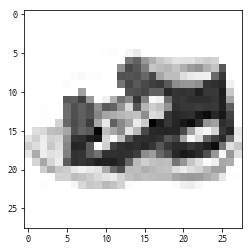

In [46]:
plt.imshow(np.reshape(ftest[300],(28,28)),cmap='gray_r')
plt.show()

In [47]:
ltest[300]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Example

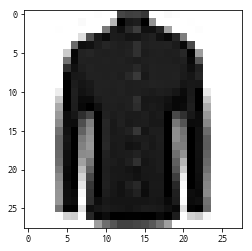

In [48]:
plt.imshow(np.reshape(ftest[5155],(28,28)),cmap='gray_r')
plt.show()

In [49]:
ltest[5155]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)